In [59]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [60]:
#MAY 20 data is missing

In [61]:
data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

In [62]:
data['first_message'] = data.groupby('user').cumcount().apply(lambda x: 1 if x == 0 else 0)

data.head(10)

,date,user,message,stream,first_message
10789,2024-05-05 16:24:24+00:00,00001joel,you ever tried snus?,4,1
12356,2024-05-05 19:53:34+00:00,00001joel,you have a boyfriend???,4,0
12361,2024-05-05 19:54:18+00:00,00001joel,:(,4,0
13132,2024-05-06 15:38:41+00:00,00001joel,whats your favourite snus!,5,0
221551,2024-07-30 15:10:31+00:00,000mrx,wtcnBay,76,1
38876,2024-05-17 18:36:08+00:00,00ramez00,my friend loves u,14,1
205726,2024-07-25 14:15:23+00:00,04lennart04,do you drink beer?,72,1
205847,2024-07-25 14:23:58+00:00,04lennart04,Malle,72,0
205862,2024-07-25 14:24:45+00:00,04lennart04,try moneyboy,72,0
104517,2024-06-11 15:38:40+00:00,062_davi,hello,37,1


In [63]:
data[data['user'] == 'balintboss']

,date,user,message,stream,first_message
21,2024-05-01 15:06:18+00:00,balintboss,ready to 1984,0,1
60,2024-05-01 15:10:39+00:00,balintboss,ADHD,0,0
69,2024-05-01 15:11:14+00:00,balintboss,hell no,0,0
84,2024-05-01 15:12:31+00:00,balintboss,hike,0,0
146,2024-05-01 15:18:24+00:00,balintboss,o7,0,0
...,...,...,...,...,...
232768,2024-08-02 18:56:13+00:00,balintboss,she pause his timer when sleep,79,0
232771,2024-08-02 18:56:48+00:00,balintboss,he*,79,0
232797,2024-08-02 18:58:49+00:00,balintboss,o7,79,0
232799,2024-08-02 18:59:14+00:00,balintboss,bye,79,0


In [64]:
data['first_message'].describe()

count    232816.000000
mean          0.028430
std           0.166199
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: first_message, dtype: float64

In [65]:
#unique chaterrs each stream
unique_chatters_per_stream = data.groupby('stream')['user'].nunique()

In [66]:
# Calculate the number of first messages per stream
first_messages_per_stream = data.groupby('stream')['first_message'].sum()


# Calculate the total number of messages per stream
total_messages_per_stream = data['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'first_messages': first_messages_per_stream,
    'total_messages': total_messages_per_stream,
    'unique_chatters': unique_chatters_per_stream
})


stream_stats

,first_messages,total_messages,unique_chatters
stream,,,
0,177,1985,177
1,150,3046,213
2,104,2754,185
3,84,2375,184
4,76,2455,182
...,...,...,...
75,154,5389,459
76,79,2671,292
77,115,4261,365


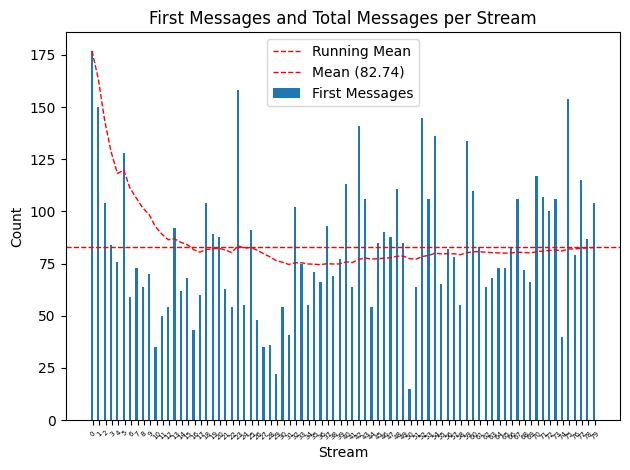

In [67]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['first_messages'], bar_width, label='First Messages')

# Calculate mean of first messages
mean_first_messages = stream_stats['first_messages'].mean()

stream_stats['first_messages_avg'] = stream_stats['first_messages'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['first_messages_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(mean_first_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_first_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats.index, fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()


In [68]:
data[data['stream']== 50].head(10)

,date,user,message,stream,first_message
145388,2024-06-29 12:06:23+00:00,1206paul_,we are setting it up again brb,50,0
145391,2024-06-29 12:06:34+00:00,1206paul_,pin pla,50,0
145849,2024-06-29 13:11:06+00:00,1206paul_,dude they took the phone with the server on it,50,0
145850,2024-06-29 13:11:08+00:00,1206paul_,omE,50,0
145862,2024-06-29 13:12:13+00:00,1206paul_,welp,50,0
145868,2024-06-29 13:12:53+00:00,1206paul_,nice,50,0
145970,2024-06-29 13:20:43+00:00,1206paul_,fixing,50,0
145253,2024-06-29 11:58:25+00:00,55Dash,yo,50,0
145270,2024-06-29 11:59:02+00:00,55Dash,the gkey guy,50,0
145287,2024-06-29 12:00:29+00:00,55Dash,real,50,0


In [69]:
stream_stats.describe()

,first_messages,total_messages,unique_chatters,first_messages_avg
count,80.000000,80.000000,80.000000,80.000000
mean,82.737500,2910.200000,255.487500,85.776793
std,32.327338,1137.802038,73.216169,18.313655
min,15.000000,796.000000,93.000000,74.486486
25%,62.750000,2083.000000,201.500000,77.801136
50%,77.500000,2655.500000,248.000000,80.404072
75%,104.000000,3636.750000,314.000000,82.424781
max,177.000000,7033.000000,459.000000,177.000000


In [70]:
# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

In [71]:
stream_stats.head(10)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length
stream,,,,,
0,177,1985,177,177.000000,17697.0
1,150,3046,213,163.500000,17831.0
2,104,2754,185,143.666667,19147.0
3,84,2375,184,128.750000,17451.0
4,76,2455,182,118.200000,18734.0
5,128,4276,278,119.833333,20382.0
6,59,2004,164,111.142857,16563.0
7,73,2340,205,106.375000,17773.0
8,64,2838,192,101.666667,18686.0


In [72]:
stream_stats['stream_length_hour'] = stream_stats['stream_length'] /60 /60

In [73]:
stream_stats.head(5)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour
stream,,,,,,
0,177,1985,177,177.000000,17697.0,4.915833
1,150,3046,213,163.500000,17831.0,4.953056
2,104,2754,185,143.666667,19147.0,5.318611
3,84,2375,184,128.750000,17451.0,4.847500
4,76,2455,182,118.200000,18734.0,5.203889


In [74]:
stream_stats['stream_length_per_firt'] = stream_stats['first_messages'] / stream_stats['stream_length_hour'] 

In [75]:
stream_stats.head(20)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt
stream,,,,,,,
0,177,1985,177,177.000000,17697.0,4.915833,36.006103
1,150,3046,213,163.500000,17831.0,4.953056,30.284336
2,104,2754,185,143.666667,19147.0,5.318611,19.553977
3,84,2375,184,128.750000,17451.0,4.847500,17.328520
4,76,2455,182,118.200000,18734.0,5.203889,14.604462
5,128,4276,278,119.833333,20382.0,5.661667,22.608184
6,59,2004,164,111.142857,16563.0,4.600833,12.823764
7,73,2340,205,106.375000,17773.0,4.936944,14.786474
8,64,2838,192,101.666667,18686.0,5.190556,12.330087


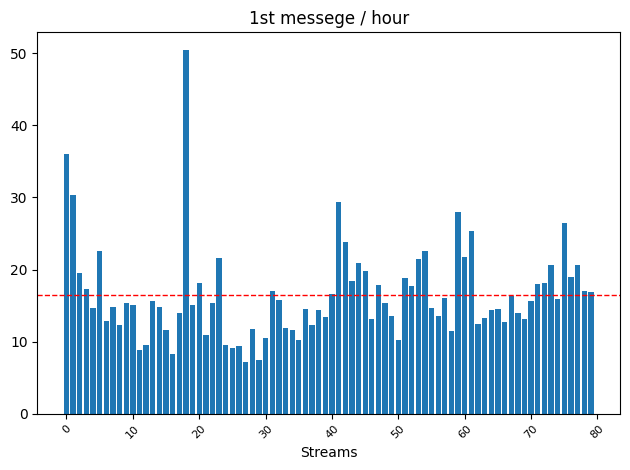

In [76]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['stream_length_per_firt'])

# Calculate mean of first messages
mean_stream_length_per_firt = stream_stats['stream_length_per_firt'].mean()

# Draw the mean line
ax.axhline(mean_stream_length_per_firt, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_stream_length_per_firt:.2f})')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_title('1st messege / hour', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [77]:
stream_stats['stream_length_per_firt'].describe()

count    80.000000
mean     16.503829
std       6.614840
min       7.228916
25%      12.694312
50%      15.240254
75%      18.478108
max      50.390310
Name: stream_length_per_firt, dtype: float64

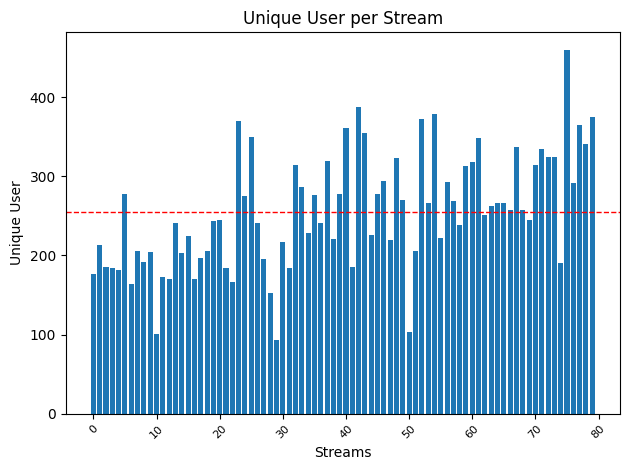

In [78]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['unique_chatters'])

# Calculate mean of first messages
mean_stream_unique = stream_stats['unique_chatters'].mean()

# Draw the mean line
ax.axhline(mean_stream_unique, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_stream_unique:.2f})')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Unique User', fontsize=10)
ax.set_title('Unique User per Stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [79]:
stream_stats['unique_chatters_per_hour'] = stream_stats['unique_chatters'] / stream_stats['stream_length_hour']

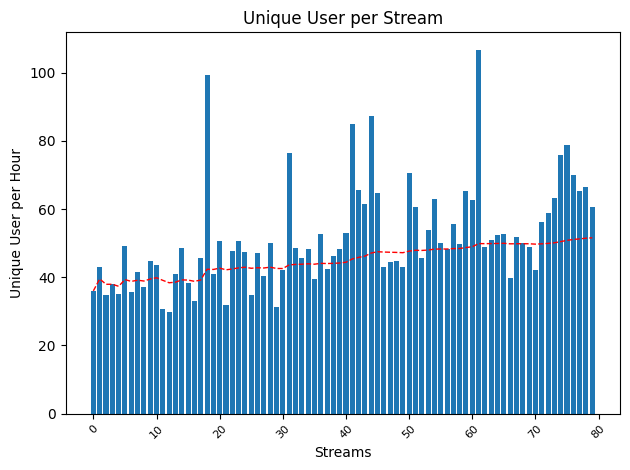

In [80]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['unique_chatters_per_hour'])

# Calculate mean of first messages
stream_stats['unique_chatters_per_hour_avg'] = stream_stats['unique_chatters_per_hour'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['unique_chatters_per_hour_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Unique User per Hour', fontsize=10)
ax.set_title('Unique User per Stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [81]:
# Group by stream and aggregate users
stream_users = data.groupby('stream')['user'].apply(set).reset_index()
stream_users.columns = ['stream', 'users']

# Initialize columns for returning users and their count
stream_users['returning_users'] = [set()] * len(stream_users)
stream_users['returning_count'] = 0

# Loop through streams to identify returning users
for i in range(1, len(stream_users)):
    current_users = stream_users.at[i, 'users']
    previous_users = stream_users.at[i - 1, 'users']
    
    # Identify returning users
    returning_users = current_users.intersection(previous_users)
    
    # Update dataframe with returning users and their count
    stream_users.at[i, 'returning_users'] = returning_users
    stream_users.at[i, 'returning_count'] = len(returning_users)

stream_users.head(10)

,stream,users,returning_users,returning_count
0,0,"{alv4hh, notrepo, Gylfen, snayke3, x3lolx, ton...",{},0
1,1,"{xiorecs, yata_lukas, Gabor4G, x3lolx, BMidf, ...","{BanjoCash, Nightbot, Wii_Gii, Trizze, 爪口长工, x...",63
2,2,"{Jamoona, x3lolx, tonymontana3331, IvanOnMyOwn...","{BanjoCash, Nightbot, Wii_Gii, Trizze, Mudjxg,...",70
3,3,"{oneyeetiboi, Gylfen, JerckZ, Gabor4G, tonymon...","{Nightbot, Wii_Gii, Trizze, aR71xx, tonymontan...",71
4,4,"{seryogarbb, john93s, mymami588, kittneee, x3l...","{Nightbot, Wii_Gii, Trizze, sekasekas, Skirmis...",62
5,5,"{The_Only_Hound, jbp555, Gabor4G, x3lolx, kpap...","{x3lolx, tonymontana3331, IvanOnMyOwn, swi1zz,...",80
6,6,"{Gabor4G, x3lolx, tonymontana3331, IvanOnMyOwn...","{Gabor4G, x3lolx, tonymontana3331, IvanOnMyOwn...",78
7,7,"{GreyEyedBlonde, The_Only_Hound, smokedrinker_...","{Nightbot, jeoodezi, lord_ruschman, Mudjxg, Ty...",64
8,8,"{The_Only_Hound, smokedrinker_, Gabor4G, tonym...","{The_Only_Hound, smokedrinker_, Nightbot, Triz...",76
9,9,"{910x, smokedrinker_, x3lolx, onkosejuha, tony...","{smokedrinker_, helios34, Trizze, rysiu4, Typh...",68


In [82]:
stream_stats.head(2)

,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg
stream,,,,,,,,,
0,177,1985,177,177.0,17697.0,4.915833,36.006103,36.006103,36.006103
1,150,3046,213,163.5,17831.0,4.953056,30.284336,43.003758,39.504930


In [83]:
stream_stats = pd.merge(stream_stats, stream_users, on='stream', how='right')

stream_stats.head(2)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count
0,0,177,1985,177,177.0,17697.0,4.915833,36.006103,36.006103,36.006103,"{alv4hh, notrepo, Gylfen, snayke3, x3lolx, ton...",{},0
1,1,150,3046,213,163.5,17831.0,4.953056,30.284336,43.003758,39.504930,"{xiorecs, yata_lukas, Gabor4G, x3lolx, BMidf, ...","{BanjoCash, Nightbot, Wii_Gii, Trizze, 爪口长工, x...",63


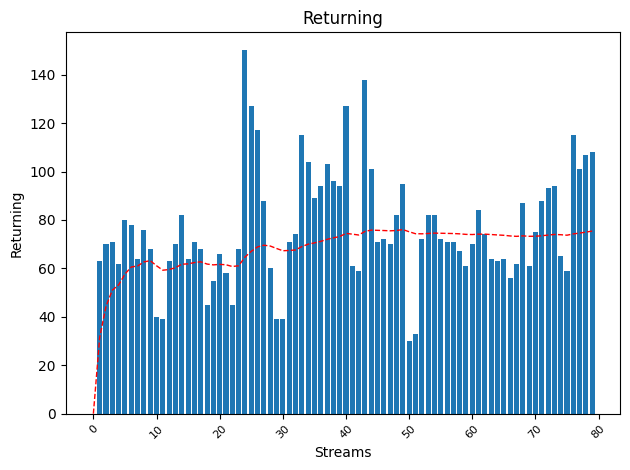

In [84]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for stream_length_per_first
ax.bar(stream_stats.index, stream_stats['returning_count'])

# Calculate mean of first messages
stream_stats['returning_count_avg'] = stream_stats['returning_count'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['returning_count_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Returning', fontsize=10)
ax.set_title('Returning', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [85]:
# Path to your Excel file
file_path = 'DorozeaStreamStats.xlsx'

# Reading a specific sheet with custom column names and skipping the first two rows
exelStats = pd.read_excel(file_path, sheet_name='Munkalap1', header=None, names=['stream', 'avg', 'max','follow'], skiprows=1)

# Display the DataFrame
exelStats.head(5)

,stream,avg,max,follow
0,0,129,145,9
1,1,152,290,24
2,2,126,161,12
3,3,133,169,21
4,4,148,177,67


In [86]:
stream_stats = pd.merge(stream_stats, exelStats, on='stream', how='right')

stream_stats.head(5)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count,returning_count_avg,avg,max,follow
0,0,177,1985,177,177.000000,17697.0,4.915833,36.006103,36.006103,36.006103,"{alv4hh, notrepo, Gylfen, snayke3, x3lolx, ton...",{},0,0.000000,129,145,9
1,1,150,3046,213,163.500000,17831.0,4.953056,30.284336,43.003758,39.504930,"{xiorecs, yata_lukas, Gabor4G, x3lolx, BMidf, ...","{BanjoCash, Nightbot, Wii_Gii, Trizze, 爪口长工, x...",63,31.500000,152,290,24
2,2,104,2754,185,143.666667,19147.0,5.318611,19.553977,34.783517,37.931126,"{Jamoona, x3lolx, tonymontana3331, IvanOnMyOwn...","{BanjoCash, Nightbot, Wii_Gii, Trizze, Mudjxg,...",70,44.333333,126,161,12
3,3,84,2375,184,128.750000,17451.0,4.847500,17.328520,37.957710,37.937772,"{oneyeetiboi, Gylfen, JerckZ, Gabor4G, tonymon...","{Nightbot, Wii_Gii, Trizze, aR71xx, tonymontan...",71,51.000000,133,169,21
4,4,76,2455,182,118.200000,18734.0,5.203889,14.604462,34.973844,37.344986,"{seryogarbb, john93s, mymami588, kittneee, x3l...","{Nightbot, Wii_Gii, Trizze, sekasekas, Skirmis...",62,53.200000,148,177,67


In [87]:
stream_stats.tail(5)

,stream,first_messages,total_messages,unique_chatters,first_messages_avg,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,unique_chatters_per_hour_avg,users,returning_users,returning_count,returning_count_avg,avg,max,follow
75,75,154,5389,459,82.026316,20950.0,5.819444,26.463007,78.873508,50.814802,"{xprophet_x, ironhikky, vArtorias, Kewadu, Iva...","{thewalkingkled, xprophet_x, Nightbot, ironhik...",59,73.710526,279,345,100
76,76,79,2671,292,81.987013,14994.0,4.165000,18.967587,70.108043,51.065364,"{don4ester1, MrSupreme50, VaettrTV, basketbalI...","{kloyn1337__, ShineAizeNnFPS, swe_solar, IvanO...",115,74.246753,215,259,73
77,77,115,4261,365,82.410256,20128.0,5.591111,20.568362,65.282194,51.247631,"{bigkelson, xprophet_x, dun_just_get_robac, re...","{kloyn1337__, slickclanftw, ShineAizeNnFPS, Iv...",101,74.589744,224,268,82
78,78,87,2490,341,82.468354,18445.0,5.123611,16.980211,66.554622,51.441390,"{MrSupreme50, xprophet_x, dun_just_get_robac, ...","{xprophet_x, dun_just_get_robac, ShineAizeNnFP...",107,75.000000,194,234,104
79,79,104,3628,375,82.737500,22263.0,6.184167,16.817141,60.638728,51.556357,"{MrSupreme50, xprophet_x, dun_just_get_robac, ...","{MrSupreme50, xprophet_x, dun_just_get_robac, ...",108,75.412500,231,351,84
